In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def imshow(images, figsize=(20, 10)):
  image_num = len(images)
  plt.figure(figsize=figsize)
  for i in range(image_num):
    plt.subplot(1, image_num, i+1)
    plt.imshow(images[i], cmap='gray')

# Hough Transform

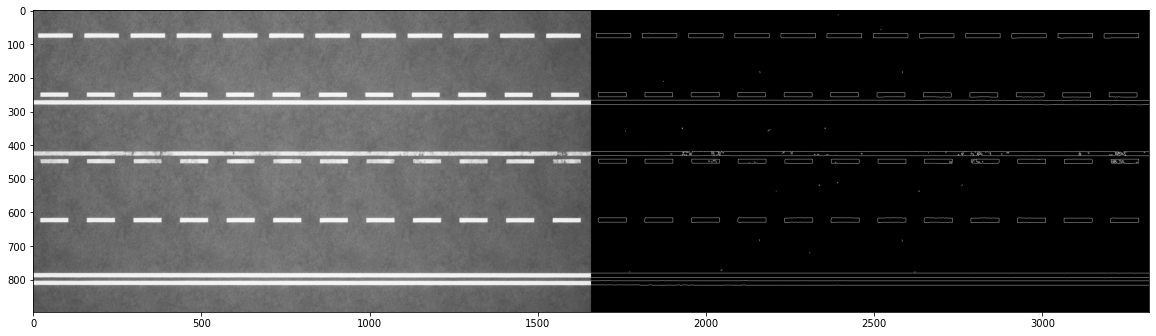

In [ ]:
img = cv2.imread('./road-2.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_canny = cv2.Canny(img_gray, 100, 200)
imshow([np.concatenate((img_gray, img_canny), 1)])

## Hough lines
```python
cv2.HougLines(image, d_rho, d_theta, threshold)
```

**d_rho**: distance resolution of the accumulator in pixels.

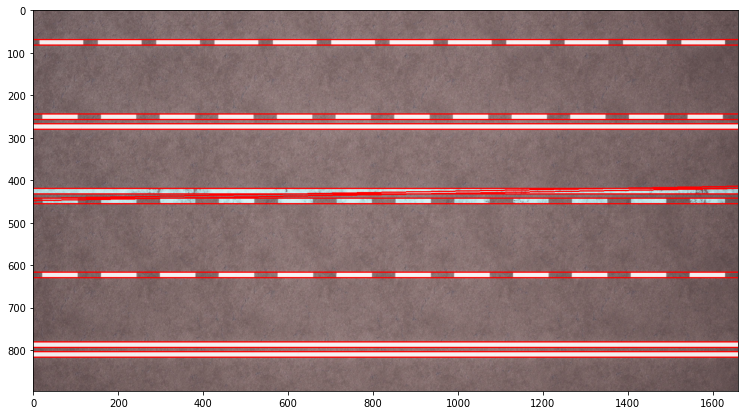

In [ ]:
img_hough_lines = img.copy()
# detect lines
lines = cv2.HoughLines(img_canny, 1, np.pi / 180, 200) # high thresh, high accuracy, less detection!
rho_max = np.sqrt(img.shape[0]**2 + img.shape[1]**2)

for line in lines:
  rho = line[0][0]
  theta = line[0][1]
  sin_th = np.sin(theta)
  cos_th = np.cos(theta)
  x0 = rho * cos_th
  y0 = rho * sin_th
  pts1 = (np.int0(x0 - rho_max * sin_th), np.int0(y0 + rho_max * cos_th))
  pts2 = (np.int0(x0 + rho_max * sin_th), np.int0(y0 - rho_max * cos_th))
  # Draw line
  cv2.line(img_hough_lines, pts1, pts2, (255, 0, 0), 2)
imshow([img_hough_lines], figsize=(15, 7))

### Hough lines P
Based on probability...

```python
cv2.HoughLInesP(img, d_rho, d_theta, threshold, minLineLength, maxLineGap)
```
returns points of lines...

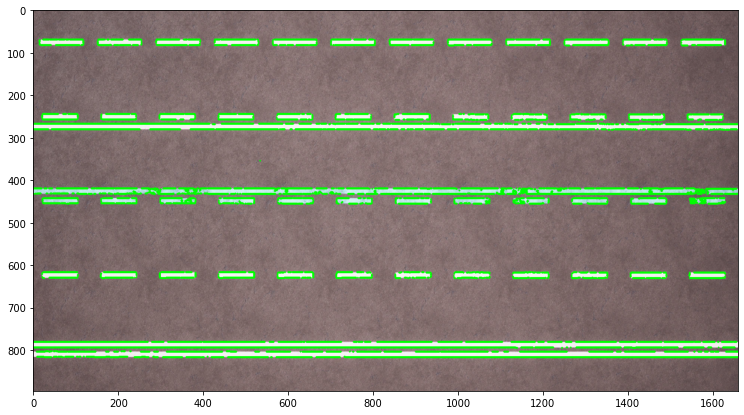

In [ ]:
img_hough_p = img.copy()
# Detect lines
lines = cv2.HoughLinesP(img_canny, 1, np.pi / 180, 10)
for line in lines:
  # Draw lines
  cv2.line(img_hough_p, (line[0][0], line[0][1]), (line[0][2], line[0][3]), (0, 255, 0), 3)
imshow([img_hough_p], figsize=(15, 7))

## Hough Circle

```python
cv2.HoughCircles(image, method, dp, minDist, param1, param2, minRadius, maxRadius)
```

In [ ]:
img = cv2.imread('./face.jpg')
img_blur = cv2.medianBlur(img, 3)
img_gray = cv2.cvtColor(img, 6)  # image in gray scale mode
circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, dp=1, minDist=50, param1=50, param2=30, minRadius=0, maxRadius=30)
circles = np.int16(circles)
circles

array([[[258, 237,  29],
        [297,  26,  23],
        [149, 342,  17],
        [178, 436,  17],
        [300, 270,  18],
        [200, 223,  15],
        [155,  64,  12],
        [232, 108,  10],
        [224,  29,   9]]], dtype=int16)

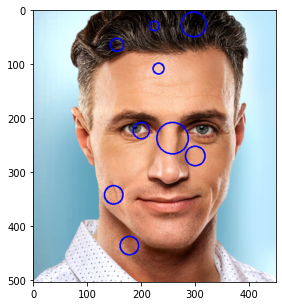

In [ ]:
for circle in circles[0]:
  cv2.circle(img, (circle[0], circle[1]), circle[2], (255, 0, 0), 2)
imshow([cv2.cvtColor(img, 4)], (10, 5))

# Corner detection

## Corner Haris
```python
cv2.cornerHarris(src, blockSize, kernelSize (sobel kernel), k=(0.4-0.6))
```
It returns a float array in same size of image containing negative values.

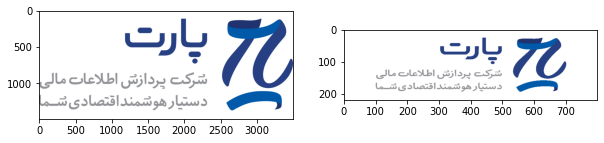

In [ ]:
img = cv2.imread('./part-logo.jpg')
img_resize = cv2.resize(img, (600, 200))
img_with_border = cv2.copyMakeBorder(img_resize, 10, 10, 100, 100, cv2.BORDER_CONSTANT, value=(255, 255, 255))
imshow([cv2.cvtColor(img, 4), cv2.cvtColor(img_with_border, 4)], (10, 5))

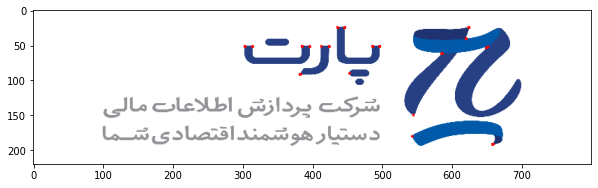

In [ ]:
img_harris = img_with_border.copy()
img_gray = cv2.cvtColor(img_with_border, 6)
img_gray = np.float32(img_gray) # Harris could have negative values!
# Detect corners
corners = cv2.cornerHarris(img_gray, 2, 3, 0.04)
corners = cv2.dilate(corners, None) # To delete neighbour corners
img_harris[corners > 0.1 * corners.max()] = [0, 0 ,255]
imshow([cv2.cvtColor(img_harris, 4)], (10, 5))

## Shi-Thomasi Corner (Eigen val)

```python
cv2.cornerMinEigenVal(img, blocksize, ksize)
```


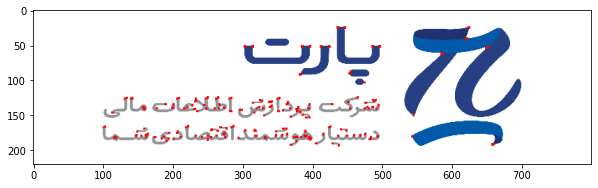

In [ ]:
img_toshi = img_with_border.copy()
img_gray = cv2.cvtColor(img_with_border, 6)
img_gray = np.float32(img_gray) # Harris could have negative values!
# Detect corners
corners = cv2.cornerMinEigenVal(img_gray, 2, 3)
corners = cv2.dilate(corners, None) # To delete neighbour corners
img_toshi[corners > 0.1 * corners.max()] = [0, 0 ,255]
imshow([cv2.cvtColor(img_toshi, 4)], (10, 5))

## Good Features to track using Shi Thomasi

```python
cv2.goodFeaturesToTrack(gray_img, maxc, Q=0.1, minD=10)
```

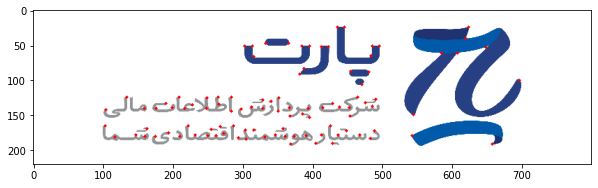

In [ ]:
img_good = img_with_border.copy()
img_gray = cv2.cvtColor(img_with_border, 6)
img_gray = np.float32(img_gray)
corners = cv2.goodFeaturesToTrack(img_gray, 100, 0.01, 10)
corners = np.int16(corners)
for cor in corners:
  cv2.circle(img_good, (cor[0][0], cor[0][1]), 2, (0, 0, 255), -1)

imshow([cv2.cvtColor(img_good, 4)], (10, 5))